In [1]:
# skip this if package has already been installed
# !pip install modvis
# !pip uninstall modvis

In [2]:
pip install -U git+https://github.com/pinshuai/modvis.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/pinshuai/modvis.git to /tmp/pip-req-build-lqcivhbp
  Running command git clone --filter=blob:none --quiet https://github.com/pinshuai/modvis.git /tmp/pip-req-build-lqcivhbp
  Resolved https://github.com/pinshuai/modvis.git to commit 8ddd5021c7f8221fb9827171b0a1ef4cbec68cd4
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

model_dir = "../data/model_output"

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc.

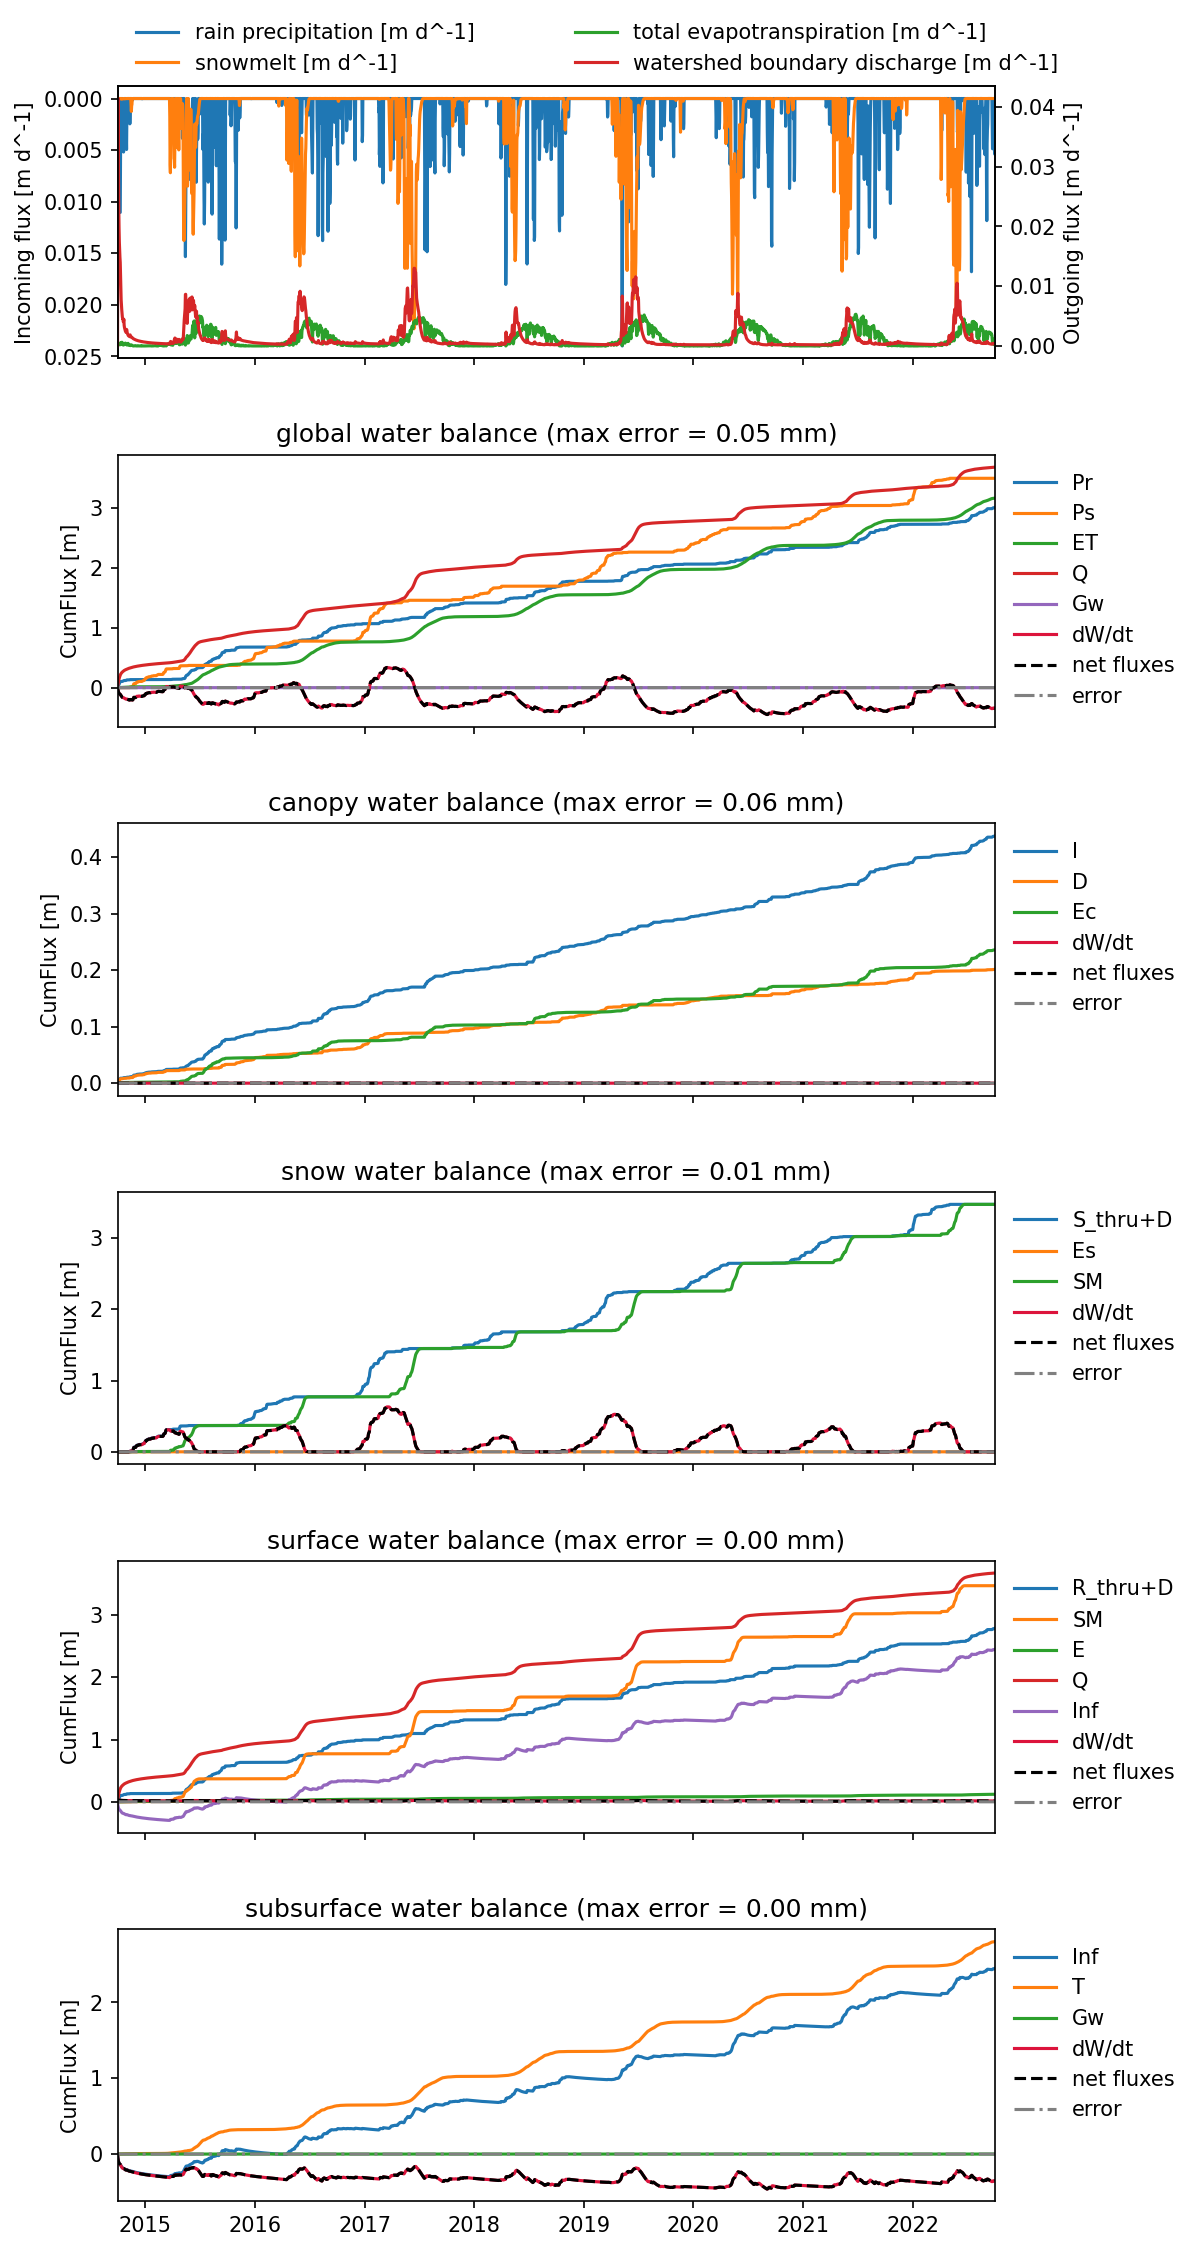

In [4]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance-daily.dat",
                                plot = True)

## Load observation data

In [5]:
obs_df = utils.load_nwis(sites= "09111250", start = '2015-10-01', end = '2022-10-01')

<AxesSubplot:>

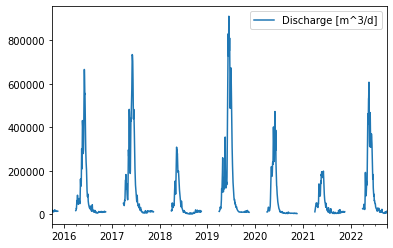

In [6]:
obs_df.plot()

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow.

In [7]:
simu_df = simu_df.loc["2015-10-01":"2022-10-01", :].copy()


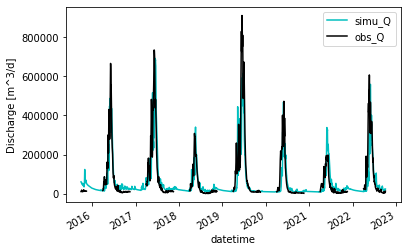

In [8]:
fig,ax = plt.subplots(1,1)
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")

obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()


In [9]:
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.tight_layout()
fig.savefig('../figures/simu_obs_hydrographs.png', dpi=500, bbox_inches='tight', pad_inches=0.3)

<Figure size 432x288 with 0 Axes>

## FDC comparison

Compare the simulated vs. observed flow duration curve.

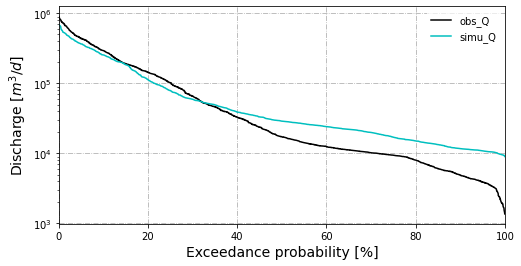

In [10]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]']],
           labels=['obs_Q','simu_Q'], 
           colors=['k', 'c'],
           start_date="2015-10-01" 
           )


In [11]:
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
plt.tight_layout()
fig.savefig('../figures/simu_obs_exceedance.png', dpi=500, bbox_inches='tight', pad_inches=0.3)

<Figure size 432x288 with 0 Axes>

## One-to-one plot

One to one scatter plot with metrics.

mKGE: 0.764552529260838, cc:  0.8296501338876576, alpha:  0.8608802379276672, beta:  0.915963541281697


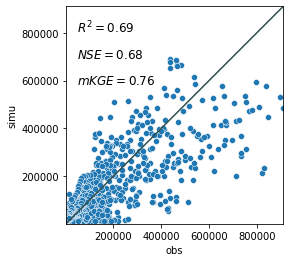

In [12]:
gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               metrics=['R^2', 'NSE', 'mKGE'],
                # metrics='all',
               show_density=False,
                start_date="2015-10-01",
                decompose_KGE=True
               )

fig = plt.gcf()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
fig.savefig('../figures/simu_obs_statistics.png', dpi=500, bbox_inches='tight', pad_inches=0.3)



In [13]:
simu_df.to_csv('base_calibrated-wb-2014_2022-GW.csv')